In [116]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [117]:
def get_data():
    data_train = load_svmlight_file('./Desktop/a9a')
    data_test = load_svmlight_file('./Desktop/a9a.t')
    return data_train[0].todense(), data_train[1], data_test[0].todense(), data_test[1]

X_train, y_train, X_test, y_test = get_data()
(n,m) = np.shape(X_train)
X_train = np.hstack((X_train, np.ones((n,1))))
(n,m) = np.shape(X_test)
X_test = np.hstack((X_test, np.zeros((n, 1))))
X_test = np.hstack((X_test, np.ones((n, 1))))
y_train = np.reshape(y_train, (len(y_train), 1))
y_test = np.reshape(y_test, (len(y_test), 1))

In [118]:
(n,m) = np.shape(X_train)

nag_train=[]
nag_test=[]
rms_train=[]
rms_test=[]
ada_train=[]
ada_test=[]
adam_train=[]
adam_test=[]

wnag=np.zeros((m,1))
vnag=np.zeros((m,1))
wrms=np.zeros((m,1))
Grms=np.zeros((m,1))
wada=np.zeros((m,1))
Gada=np.zeros((m,1))
Tada=np.zeros((m,1))
wadam=np.zeros((m,1))
Gadam=np.zeros((m,1))
madam=np.zeros((m,1))

In [119]:
def hingeloss(X, y, theta):
    l = 1 - np.multiply(y, X * theta)
    l2 = (l >= 0)
    result = np.multiply(l, l2)
    return np.sum(result)

In [120]:
def gradient(X, y, theta, aita):
    C = 1
    l = 1 - np.multiply(y, X * theta)
    l2 = (l >= 0)
    tmp = np.multiply(y, l2)
    return theta - C * np.sum(np.multiply(X, tmp), 0).T

In [121]:
def NAG(X, y, theta, v, ganma, aita):
    grad = gradient(X, y, theta - ganma * v, 0.5)
    v = ganma * v + aita * grad
    theta = theta - v
    return theta, v

In [122]:
def RMSprob(X, y, theta, G, ganma, aita, e):
    grad = gradient(X, y, theta, aita)
    dot_product = np.multiply(grad, grad)
    G = ganma * G + (1 - ganma) * dot_product
    dot = np.multiply(aita / (np.sqrt(G + e)), grad)

    theta = theta - dot
    return theta, G

In [123]:
def AdaDelta(X, y, theta, G, ganma, delta, aita, e):
    grad = gradient(X, y, theta, 1)
    dot_product = np.square(grad)
    G = ganma * G + (1 - ganma) * dot_product
    delta_w = np.multiply((np.sqrt(delta + e) / np.sqrt(G + e)), grad)
    theta = theta - delta_w
    delta = ganma * delta + (1 - ganma) * (np.square(delta_w))
    return theta, G, delta

In [124]:
def Adam(X, y, theta, G, m, ganma, t, aita, belta):
    grad = gradient(X, y, theta, 0.05)
    m = belta * m + (1 - belta) * grad
    G = ganma * G + (1 - ganma) * (np.multiply(grad, grad))
    alpha = aita * (np.sqrt(1 - math.pow(ganma, t)) / (1 - math.pow(belta,t)))
    theta = theta - alpha * (m / (np.sqrt(G + e)))
    return theta, G, m

In [125]:
ganma = 0.9
aita = 0.001
e = 0.0001
belta = 0.9

for i in range(50):
    
    X_trainset,X_other,y_trainset,y_other=train_test_split(X_train,y_train,test_size=0.995,random_state=random.randint(1,100))
    #NAG实现
    ganma = 0.9
    aita = 0.001
    wnag,vnag = NAG(X_trainset, y_trainset, wnag, vnag, ganma, aita)
  
    nag_train.append(hingeloss(X_trainset, y_trainset, wnag))
    nag_test.append(hingeloss(X_test, y_test, wnag))
   
    #RMSProb实现
    ganma = 0.9
    aita = 0.01
    wrms,Grms = RMSprob(X_trainset, y_trainset, wrms, Grms, ganma, aita, e)
    rms_train.append(hingeloss(X_trainset, y_trainset, wrms))
    rms_test.append(hingeloss(X_test, y_test, wrms))
    
    
    ganma=0.9
    aita=0.001
 
    wada,Gada,Tada = AdaDelta(X_trainset, y_trainset, wada, Gada, ganma, Tada, aita, e)
    ada_train.append(hingeloss(X_trainset, y_trainset, wada))
    ada_test.append(hingeloss(X_test, y_test, wada))
    
    #Adam实现
    ganma = 0.9
    aita = 0.01
    wadam,Gadam,madam=Adam(X_trainset, y_trainset, wadam, Gadam, madam, ganma, i+1, aita, belta)
    adam_train.append(hingeloss(X_trainset, y_trainset, wadam))
    adam_test.append(hingeloss(X_test, y_test, wadam))
    

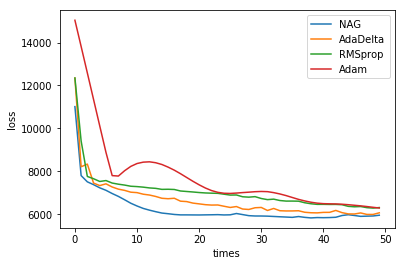

In [126]:


plt.xlabel('times')
plt.ylabel('loss')
plt.plot(range(len(nag_test)),nag_test,label="NAG")
plt.plot(range(len(ada_test)),ada_test,label="AdaDelta")
plt.plot(range(len(rms_test)),rms_test,label="RMSprop")
plt.plot(range(len(adam_test)),adam_test,label="Adam")
plt.legend()
plt.show()
